In [2]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import csv

In [4]:
query="eversendapp until:2023-03-09 since:2015-03-17 -filter:links"
tweet=[]  
limit =80000 
count=0
for tweets in sntwitter.TwitterSearchScraper(query).get_items():
    count +=1
    if len(tweet)==limit:
        break
    else:
        tweet.append([tweets.date, tweets.content, tweets.user.username,tweets.user.location, tweets.retweetCount, tweets.likeCount, tweets.sourceLabel, tweets.coordinates])
        print('Number', count, 'success')
df=pd.DataFrame(tweet, columns=['date', 'text', 'username', 'location', 'retweetcount', 'likecount', 'source', 'cordinates'])
df.to_csv('Eversend.csv', index=False) 



/tmp/ipykernel_12291/1432567860.py:10: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweet.append([tweets.date, tweets.content, tweets.user.username,tweets.user.location, tweets.retweetCount, tweets.likeCount, tweets.sourceLabel, tweets.coordinates])


Number 1 success
Number 2 success
Number 3 success
Number 4 success
Number 5 success
Number 6 success
Number 7 success
Number 8 success
Number 9 success
Number 10 success
Number 11 success
Number 12 success
Number 13 success
Number 14 success
Number 15 success
Number 16 success
Number 17 success
Number 18 success
Number 19 success
Number 20 success
Number 21 success
Number 22 success
Number 23 success
Number 24 success
Number 25 success
Number 26 success
Number 27 success
Number 28 success
Number 29 success
Number 30 success
Number 31 success
Number 32 success
Number 33 success
Number 34 success
Number 35 success
Number 36 success
Number 37 success
Number 38 success
Number 39 success
Number 40 success
Number 41 success
Number 42 success
Number 43 success
Number 44 success
Number 45 success
Number 46 success
Number 47 success
Number 48 success
Number 49 success
Number 50 success
Number 51 success
Number 52 success
Number 53 success
Number 54 success
Number 55 success
Number 56 success
N

In [1]:
import os

cwd = os.getcwd()
print(cwd)

/home/juwon/Documents/Work Website


In [29]:
df=pd.read_csv(r'/home/juwon/Eversend.csv', encoding='latin-1', index_col=None)
df.head(3)

,date,text,username,location,retweetcount,likecount,source,cordinates
0,2023-03-08 23:56:36+00:00,@eversendapp Send me,NehNesh,"New York, USA",0,1,Twitter for Android,NaN
1,2023-03-08 22:50:35+00:00,@eversendapp Eversend please check on this tra...,softechreview,Ghana,0,0,Twitter Web App,NaN
2,2023-03-08 22:47:53+00:00,@eversendapp Please Donât like my comments i...,Muhamma53561171,Jimeta Yola Nigeria,0,1,Twitter for iPhone,NaN


In [30]:
df['date']=df['date'].apply(str)
df['date'] = pd.to_datetime(df['date'])

df.head(3)


,date,text,username,location,retweetcount,likecount,source,cordinates
0,2023-03-08 23:56:36+00:00,@eversendapp Send me,NehNesh,"New York, USA",0,1,Twitter for Android,NaN
1,2023-03-08 22:50:35+00:00,@eversendapp Eversend please check on this tra...,softechreview,Ghana,0,0,Twitter Web App,NaN
2,2023-03-08 22:47:53+00:00,@eversendapp Please Donât like my comments i...,Muhamma53561171,Jimeta Yola Nigeria,0,1,Twitter for iPhone,NaN


In [5]:
import re

In [31]:
df['text']=df['text'].apply(str) #my text column  had a pandas core.series.series datatype so i had to convert into string because it was throwing a expected string like object error
df['location']=df['location'].apply(str)

In [32]:
def cleanTwt(twt):
    twt = twt.lower()
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    twt=re.sub('#eversend', 'Eversend', twt) #remnove has tags from Peter Obi
    twt = re.sub ('#eversend', 'Eversend', twt)
    twt= re.sub('#eversend', 'Eversend', twt)
    twt= re.sub('#eversend', 'Eversend', twt)
    twt=re.sub('#[A-Za-z0-9]+', '', twt) #removes any string with a has tag
    twt=re.sub('\\n', '', twt) #removes all \n from strings 
    twt=re.sub('https?:\/\/\s+', '', twt) #removes all hyperlinks 
    twt = re.sub('\@\w+|\#\w+|\d+','',twt) # Remove @mentions
    twt = re.sub('#','',twt)  #Removing the # symbols
    twt = re.sub(':','',twt)  #Removing the : symbols
    twt = re.sub('\"','',twt) #Removing the " symbols
    twt = re.sub('\”','',twt) #Removing the ” symbols
    twt = re.sub('\“','',twt) #Removing the “ symbols
    twt = re.sub('\’','',twt) #Removing the ’ symbols
    twt = re.sub('\/','',twt) #Removing the / symbols
    twt = re.sub('\|','',twt) #Removing the | symbols
    twt = re.sub('\?','',twt) #Removing the ? symbols
    twt = re.sub('\.','',twt) #Removing the . symbols
    twt = re.sub('\,','',twt) #Removing the , symbols
    twt = re.sub('\!','',twt) #Removing the ! symbols
    twt = re.sub('@','',twt) #Removing the @ symbols
    twt = re.sub('\'','',twt) #Removing the ' symbols
    twt = re.sub('\\n','',twt) #Removing the \n symbols
    twt = re.sub('\\r','',twt) #Removing the \r symbols
    twt = re.sub('\*','',twt) #Removing the * symbols
    return twt 

df['cleaned_tweets']= df['text'].apply(cleanTwt)
df['location']=df['location'].apply(cleanTwt)
df.head(3)



,date,text,username,location,retweetcount,likecount,source,cordinates,cleaned_tweets
0,2023-03-08 23:56:36+00:00,@eversendapp Send me,NehNesh,new york usa,0,1,Twitter for Android,NaN,send me
1,2023-03-08 22:50:35+00:00,@eversendapp Eversend please check on this tra...,softechreview,ghana,0,0,Twitter Web App,NaN,eversend please check on this transaction its...
2,2023-03-08 22:47:53+00:00,@eversendapp Please Donât like my comments i...,Muhamma53561171,jimeta yola nigeria,0,1,Twitter for iPhone,NaN,please donât like my comments if you like y...


In [8]:
from textblob import TextBlob
import numpy as np 

In [33]:
#Get subjectivity in Obi tweets 
def getSubjectivity(twt):
    return TextBlob (twt).sentiment.subjectivity
def getPolarity(twt):
    return TextBlob (twt).sentiment.polarity
#create colums for subjecxtivity and polarity
df['subjectivity']=df['cleaned_tweets'].apply(getSubjectivity)
df['polarity']=df['cleaned_tweets'].apply(getPolarity)
df.head(3)

,date,text,username,location,retweetcount,likecount,source,cordinates,cleaned_tweets,subjectivity,polarity
0,2023-03-08 23:56:36+00:00,@eversendapp Send me,NehNesh,new york usa,0,1,Twitter for Android,NaN,send me,0.0,0.0
1,2023-03-08 22:50:35+00:00,@eversendapp Eversend please check on this tra...,softechreview,ghana,0,0,Twitter Web App,NaN,eversend please check on this transaction its...,0.0,0.0
2,2023-03-08 22:47:53+00:00,@eversendapp Please Donât like my comments i...,Muhamma53561171,jimeta yola nigeria,0,1,Twitter for iPhone,NaN,please donât like my comments if you like y...,0.0,0.0


In [34]:
#create a function to get the text sentiment 
def GetSentiment(score):
    if score<0:
        return 'negative'
    elif score ==0:
        return 'neutral'
    else:
        return 'positive'
df['sentiment']= df['polarity'].apply(GetSentiment)
df.head(30)

,date,text,username,location,retweetcount,likecount,source,cordinates,cleaned_tweets,subjectivity,polarity,sentiment
0,2023-03-08 23:56:36+00:00,@eversendapp Send me,NehNesh,new york usa,0,1,Twitter for Android,NaN,send me,0.000000,0.000000,neutral
1,2023-03-08 22:50:35+00:00,@eversendapp Eversend please check on this tra...,softechreview,ghana,0,0,Twitter Web App,NaN,eversend please check on this transaction its...,0.000000,0.000000,neutral
2,2023-03-08 22:47:53+00:00,@eversendapp Please Donât like my comments i...,Muhamma53561171,jimeta yola nigeria,0,1,Twitter for iPhone,NaN,please donât like my comments if you like y...,0.000000,0.000000,neutral
3,2023-03-08 20:45:36+00:00,@eversendapp Be solve the problems we are expe...,TererKiplangat4,nan,0,2,Twitter for Android,NaN,be solve the problems we are experiencing now...,0.500000,0.000000,neutral
4,2023-03-08 20:36:10+00:00,@eversendapp Cool,godsway_agbeli,nan,0,2,Twitter for Android,NaN,cool,0.650000,0.350000,positive
5,2023-03-08 20:05:52+00:00,@eversendapp Abeg how can I open a ghana acct ..,AnikpeObiora,nan,0,1,Twitter for Android,NaN,abeg how can i open a ghana acct,0.500000,0.000000,neutral
6,2023-03-08 19:01:43+00:00,@eversendapp You can win,OWOLABITimoth11,nan,0,3,Twitter for Android,NaN,you can win,0.400000,0.800000,positive
7,2023-03-08 18:38:23+00:00,@eversendapp Eversend ever good,Elias520070091,nan,0,2,Twitter for Android,NaN,eversend ever good,0.600000,0.700000,positive
8,2023-03-08 17:32:08+00:00,@eversendapp I use Eversend App Regularly.,CollinsOgochuk2,uganda nigeria,0,1,Twitter for Android,NaN,i use eversend app regularly,0.076923,0.000000,neutral
9,2023-03-08 17:28:44+00:00,@eversendapp all other virtual cards operators...,urban_Culture_,,0,0,Twitter for Android,NaN,all other virtual cards operators dont operat...,0.305556,-0.138889,negative


In [12]:
df['sentiment'].value_counts()

neutral     13287
positive     6411
negative     2606
Name: sentiment, dtype: int64

In [36]:
df.to_csv('EversendFinal_tweets.csv',encoding='utf-8-sig', index=False)
import os

cwd = os.getcwd()
print(cwd)

/home/juwon/Documents/First Project Portfolio/second project


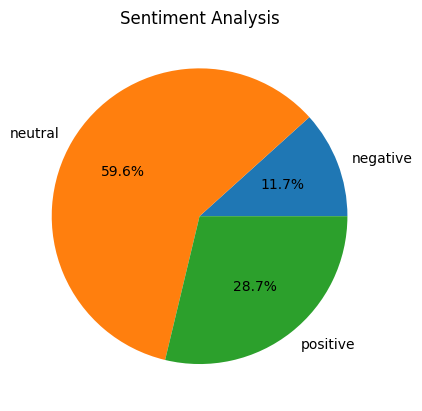

In [13]:

import matplotlib.pyplot as plt

# filter the columns you need
df = df[['sentiment']]

# group the data by sentiment and count the number of occurrences of each sentiment
sentiment_counts = df.groupby(['sentiment']).size()

# plot the pie chart
sentiment_counts.plot(kind='pie', autopct='%1.1f%%')

# set the title of the plot
plt.title('Sentiment Analysis')

# show the plot
plt.show()


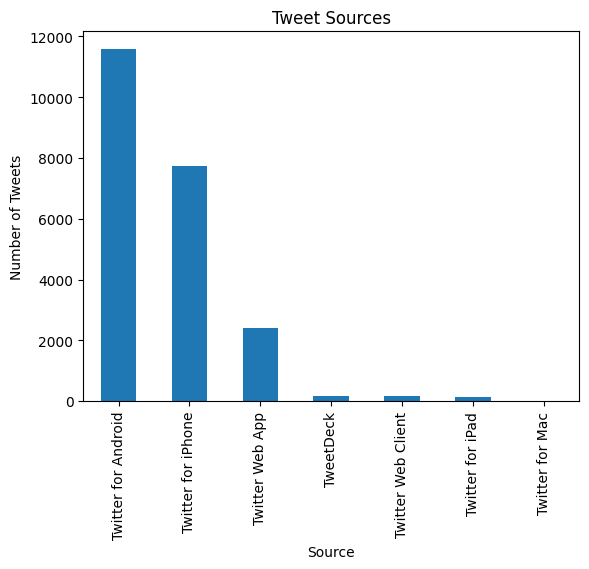

In [18]:
# filter the columns you need
df = df[['source']]

# group the data by source and count the number of occurrences of each source
source_counts = df.groupby(['source']).size()

# sort the source counts in descending order
source_counts = source_counts.sort_values(ascending=False)

# select the top 7 sources
source_counts = source_counts[:7]

# plot the bar chart
source_counts.plot(kind='bar')

# set the title and labels of the plot
plt.title('Tweet Sources')
plt.xlabel('Source')
plt.ylabel('Number of Tweets')

# show the plot
plt.show()



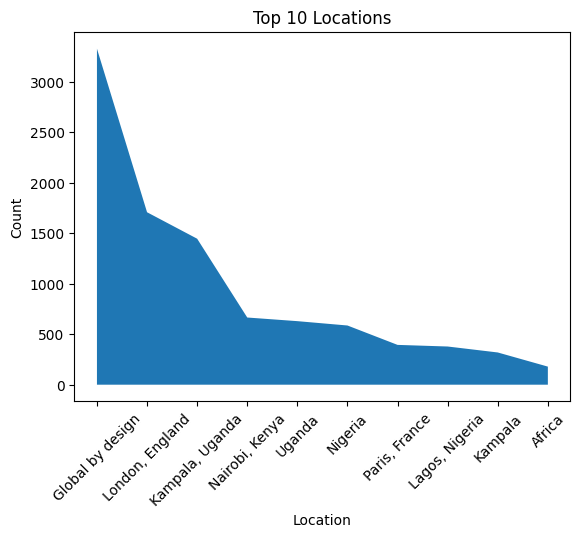

In [25]:
df=pd.read_csv(r'/home/juwon/Eversend.csv', encoding='latin-1', index_col=None)
# assuming your original DataFrame is named df
location_counts = df['location'].value_counts()  # get the count of each location
top_10_locations = location_counts.head(10)  # select the top 10 locations

# create a new DataFrame with the top 10 locations and their counts
df_top_10_locations = pd.DataFrame({'location': top_10_locations.index, 'count': top_10_locations.values})

# sort the DataFrame by count in descending order
df_top_10_locations = df_top_10_locations.sort_values(by='count', ascending=False)

# create the area chart
plt.fill_between(df_top_10_locations['location'], df_top_10_locations['count'])

# set the title and labels of the plot
plt.title('Top 10 Locations')
plt.xlabel('Location')
plt.ylabel('Count')

# rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# show the plot
plt.show()


In [57]:
# remove any rows with NaN values
df_top_10_locations = df_top_10_locations.dropna()

,date,text,username,location,retweetcount,likecount,source,cordinates,cleaned_tweets,subjectivity,polarity
105,2023-02-23 07:19:21+00:00,@bashlima @eversendapp Ugandans are too eeeh.,Era_sayz,near uganda,0,1,Twitter for Android,"Coordinates(longitude=32.4166234, latitude=0.1...",ugandans are too eeeh,0.000000,0.000000
107,2023-02-23 06:17:48+00:00,@eversendapp come on check DM please.,Era_sayz,near uganda,0,0,Twitter for Android,"Coordinates(longitude=32.4166234, latitude=0.1...",come on check dm please,0.000000,0.000000
110,2023-02-22 07:51:36+00:00,@EversendHelp @eversendapp Thanks ðð¾,lubegapaul,mbarara uganda,0,0,Twitter for Android,"Coordinates(longitude=31.5623121, latitude=4.8...",thanks ðð¾,0.200000,0.200000
112,2023-02-22 07:22:07+00:00,@EversendHelp @eversendapp When are you guys r...,srtlp5604,unknown,0,0,Twitter for iPhone,"Coordinates(longitude=32.4166234, latitude=0.1...",when are you guys reverting my money,0.000000,0.000000
114,2023-02-22 06:11:56+00:00,@eversendapp @EversendHelp Please check DM. UR...,lubegapaul,mbarara uganda,0,0,Twitter for Android,"Coordinates(longitude=31.5623121, latitude=4.8...",please check dm urgent,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
22274,2018-03-11 11:56:38+00:00,@Liclyn_SA @Omoso_Omoso @spartakussug @tmsruge...,StoneAtwine,london england,0,2,Twitter for iPhone,"Coordinates(longitude=2.3138058, latitude=48.9...",isnât life beautiful people can actuall...,0.550000,0.425000
22275,2018-02-26 15:47:54+00:00,"@rexyfayed @eversendapp Hi Rexy, please email ...",StoneAtwine,london england,0,0,Twitter for iPhone,"Coordinates(longitude=2.3138058, latitude=48.9...",hi rexy please email me here stoneco,0.000000,0.000000
22279,2018-01-17 15:12:44+00:00,@roxannevarza @joinstationf This would be @eve...,StoneAtwine,london england,0,1,Twitter for iPhone,"Coordinates(longitude=2.2241006, latitude=48.8...",this would be right or do we have another one,0.535714,0.285714
22294,2017-06-24 11:52:49+00:00,"With @eversendapp, we want to remove friction ...",StoneAtwine,london england,1,0,Twitter for iPhone,"Coordinates(longitude=2.2241006, latitude=48.8...",with we want to remove friction so that its p...,0.708333,0.566667


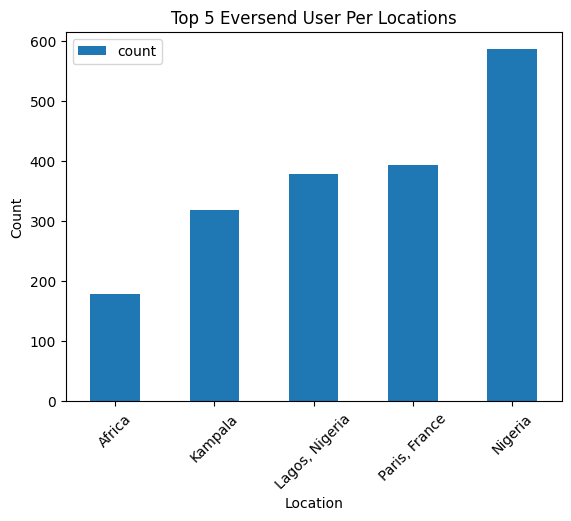

In [24]:
df=pd.read_csv(r'/home/juwon/Eversend.csv', encoding='latin-1', index_col=None)
# assuming your original DataFrame is named df
location_counts = df['location'].value_counts()  # get the count of each location
top_10_locations = location_counts.head(10)  # select the top 10 locations

# create a new DataFrame with the top 10 locations and their counts
df_top_10_locations = pd.DataFrame({'location': top_10_locations.index, 'count': top_10_locations.values})

df=pd.read_csv(r'/home/juwon/Eversend.csv', encoding='latin-1', index_col=None)
# sort the DataFrame by count in descending order
df_top_10_locations = df_top_10_locations.sort_values(by='count', ascending=True)

# drop any rows with NaN values in the "count" column
df_top_10_locations = df_top_10_locations.dropna(subset=['count'])

# show only the top 5 locations
df_top_5_locations = df_top_10_locations.head(5)

# create the stacked column bar chart
df_top_5_locations.plot(kind='bar', x='location', y='count', stacked=True)

# set the title and labels of the plot
plt.title('Top 5 Eversend User Per Locations')
plt.xlabel('Location')
plt.ylabel('Count')

# rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# show the plot
plt.show()


In [27]:
df.to_csv('EversendFinal_tweets.csv',encoding='utf-8-sig', index=False)
import os

cwd = os.getcwd()
print(cwd)

/home/juwon/Documents/First Project Portfolio/second project
